# 통계

In [1]:
from collections import Counter
import matplotlib.pyplot as plt

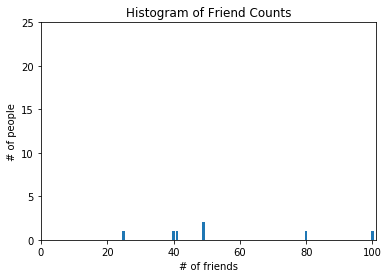

In [2]:
num_friends = [100, 49, 41, 49, 40, 25, 80]

friend_counts = Counter(num_friends)
xs = range(101)                      # 최대값은 100
ys = [friend_counts[x] for x in xs] # 히스토그램의 높이는 해당 친구 수를 갖고 있는 사용자 수
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel('# of friends')
plt.ylabel("# of people")
plt.show()

## 히스토그램에 대한 통계치

In [3]:
num_points = len(num_friends) # 사이즈 : 6

largest_value = max(num_friends) # 최대값 :100 
smallest_value = min(num_friends) # 최소값 : 25

- 최대값과 최소값을 구하는 문제는 정렬된 리스트의 특정 위치에 있는 값을 구하는 문제로 볼 수 있다.

In [4]:
sorted_values = sorted(num_friends)
smallest_vlaue = sorted_values[0] # 25
second_smallest_value = sorted_values[1] # 40
second_largest_value = sorted_values[-2] # 80

## 1.중심 경향성
- 데이터의 중심이 어디 있는지를 나타내는 중심 경향성(central tendency) 지표는 매우 중요
- 데이터의 값을 데이터 포인트의 개수로 나눈 평균을 사용

### 평균
- 평균은 중앙값보다 계산하기 간편하며 데이터가 바뀌어도 값의 변화가 더 부드럽다
- n개의 데이터 포인트가 주어졌을 때, 데이터 포인트 한 개의 값이 작은 수 e만큼 증가한다면 평균은 e/n만큼 증가
- 평균은 이상치에 매우 민감하다.

In [5]:
from typing import List


def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

54.857142857142854

### 중앙값
- 중앙값을 찾기 위해서는 주어진 데이터를 정렬해야 함
- 중앙 값의 데이터 포인트 한 개의 값이 작은 수 e만큼 증가한다면 중앙값은 e만큼 증가할 수도 있고, e보다 작은 값만큼 증가할 수도 있다. 또는 변하지 않을 수도 있다

In [6]:
def _median_odd(xs: List[float]) -> float:
    """len(xs)가 홀수면 중앙값을 반환"""
    return sorted(xs)[len(xs) //2]

def _median_even(xs: List[float]) -> float:
    """len(xs)가 짝수면 두 중앙값의 평균을 반환"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs)//2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) /2

def median(v: List[float]) -> float:
    """v의 중앙값을 계산"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) /2

median(num_friends)

49

### 분위
- 중앙값을 포괄하는 개념, 특정 백분위보다 낮은 분위에 속하는 데이터를 의미
- 중앙값은 상위 50%의 데이터보다 작은 값을 의미

In [7]:
def quantile(xs: List[float], p: float) -> float:
    """x의 p분위에 속하는 값을 반환"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

25
40
80
100


### 최빈값
- 데이터에서 가장 자주 나오는 값

In [8]:
def mode(x: List[float])->List[float]:
    """최빈값이 하나보다 많을수도 있으니 결과를 리스트로 반환"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {49}

## 2. 산포도 (Dispersion)
- 데이터가 얼마나 퍼져 있는지를 나타냄
- 0과 근접한 값이면 데이터가 거의 펴져 있지 않고 큰 값이면 매우 퍼져 있는 것을 의미

In [9]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

data_range(num_friends)

75

### 분산
- 하나의 변수가 평균에서 얼마나 멀리 떨어져 있는지 계산
- 산포도를 측정하는 개념

In [10]:
from typing import List


Vector = List[float]
# 벡터의 내적(dot product) 벡터의 각 성분별 곱한 값을 더해준 값
def dot(v: Vector, w: Vector) -> float:
    """v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32 # 1*4 + 2*5 + 3*6

In [11]:
# 내적의 개념을 사용하면 각 성분의 제곱 값의 합을 쉽게 구할 수 있음
# 제곱 값의 합을 이용하면 벡터의 크기를 계산할 수 있다.
def sum_of_squares(v : Vector) -> float:
    """v_1* v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14 # 1*1 + 2*2 + 3*3

In [12]:
#from linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """x의 모든 데이터 포인트에서 평균을 뺌(평균을 0으로 만들기 위해)"""
    x_bar = mean(xs)
    return [x- x_bar for x in xs]

def variance(xs: List[float])->float:
    """편차의 제곱의 (거의) 평균"""
    assert len(xs) >=2, "variance requires at least two elements"
    
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

673.8095238095239

### 표준편차
- 분산의 제곱근

In [13]:
# 벡터의 내적(dot product) 벡터의 각 성분별 곱한 값을 더해준 값
Vector = List[float]
def dot(v: Vector, w: Vector) -> float:
    """v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32 # 1*4 + 2*5 + 3*6

In [14]:
# 내적의 개념을 사용하면 각 성분의 제곱 값의 합을 쉽게 구할 수 있음
# 제곱 값의 합을 이용하면 벡터의 크기를 계산할 수 있다.
def sum_of_squares(v : Vector) -> float:
    """v_1* v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14 # 1*1 + 2*2 + 3*3

In [15]:
import math

def standard_deviation(xs: List[float]) ->float:
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

25.95784127791685

- 범위와 표준편차 또한 평균처럼 이상치에 민감하게 반응하는 문제가 있다.
- 더 안정적인 방법은 상위 25%에 해당하는 값과 하위 25%에 해당되는 값의 차이를 계산하는 것이다.

In [16]:
def interquartile_range(xs: List[float]) -> float:
    """상위 25%에 해당하는 값과 하위 25%에 해당되는 값의 차이를 반환"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range(num_friends)

40

### 상관관계
- 공분산에서 각각의 표준편차를 나눠 준 값

#### 분산
- 두 변수가 각가의 평균에서 얼마나 멀리 떨어져 있는지를 나타냄
- 공분산이 양수이면 x의 값이 클수록 y이 값이 크고, x의 값이 작을수록 y의 값도 작다
- 공분산이 음수이면 x의 값이 클수록 y의 값이 작고, x의 값이 작을수록 y의 값이 크다.

#### 공분산(covariance)
- 두 변수가 각각의 평균에서 얼마나 멀리 떨어져 있는지
- 공분산이 0이면 그와 같은 관계가 존재하지 않는다는 것을 의미
- 공분산의 단위는 입력 변수의 단위들을 곱해서 계산되기 때문에 이해하기 쉽지 않음
- 공분산의 절대적인 값만으로는 '크다'고 판단하기 어려움
- 이러한 이유 때문에 공분산에서 각각의 표준편차를 나눠 준 상관관계를 사용

In [17]:
def covariance(xs: List[float], ys: List[float])->float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    
    return dot(de_mean(xs), de_mean(ys))/ (len(xs) -1)

In [18]:
def correlation(xs: List[float], ys: List[float])->float:
    """xs와 ys의 값이 각각의 평균에서 얼마나 멀리 떨어져 있는지 계산"""
    stdev_x = standart_deviation(xs)
    stdev_y = standart_deviation(ys)
    
    if stdev_x > 0 and stdev_y > 0 :
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0

### 심슨의 역설
데이터 분석을 하다 보면 **혼재변수(confounding variables)**가 누락되어 상관관계가 잘못 계산되는 **심슨의 역설(Simpson's paradox)**에 직면한다.
- 혼재변수: 종속변수 외에 독립변수를 좌우하는 변수이지만, 실험설계시 고려되지 못한 변수

상관관계는 다른 모든 것이 동일할 때 두 변수의 관계를 나타낸다는 것이다. 만약 실험을 잘 설계 해서 데이터의 레이블을 무작위로 설정했다면, **다른 모든 것이 동일** 하다는 가정은 잘 맞을 것 이다. 하지만 만약 데이터의 레이블에 패턴이 존재한다면 **다른 모든 것이 동일하다는 가정은 성립하지 않는다**


이러한 문제를 해결하기 위해서는 데이터를 이해하고 변수에 영향을 주는 모든 요인을 확인하는 방법밖에 없다.